# Measures of Risk and Reward

## Volatility - Variance and Standard Deviation

Variance is a measure of volitility given by
$$\sigma_R^2 = \frac{1}{N} \sum_{i=1}^{N} (R_i - \bar{R})^2,$$
and standard deviation is the square root of variance
$$\sigma_R = \sqrt{\sigma_R^2} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (R_i - \bar{R})^2},$$
where $\bar{R}$ is the arithmetic mean of the returns.


## Annualising Volatility

We can't directly compare monthly and daily volatility data so we must annualise first.
$$\sigma_{ann} = \sigma_p \sqrt{p}$$

Example: The standard deviation of a stock's daily return is $0.1\%$ so the annualised volatility is given by $$0.001 \times \sqrt{252} = 1.58\%.$$

## Risk Adjusted Measures

If for example two different stocks had a return and volatility percentage over a given period of time we could compare the two by comparing the return on risk ratio:
$$\text{Return on Risk Ratio} =  \frac{\text{Return}}{\text{Volatility}}.$$

Instead of this we can calculate a better measure called the Sharpe Ratio. This calculates the return over the risk free rate in ratio with volatility,

$$\text{Sharpe Ratio}(P) = \frac{R_p - R_f}{\sigma_p}.$$

# Lab Session - Risk Adjusted Retrns

In [54]:
import pandas as pd
import numpy as np

In [55]:
prices = pd.read_csv('data/sample_prices.csv')
returns = prices.pct_change().dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [56]:
returns.std() # sample standard deviation

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [57]:
# population standard deviation from scratch
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [58]:
# sample standard deviation from scratch 
number_of_observations = returns.shape[0]
variance = squared_deviations.sum() / (number_of_observations - 1)
volatility = np.sqrt(variance)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [59]:
# check if values are the same
volatility == returns.std()

BLUE      True
ORANGE    True
dtype: bool

In [60]:
# annualising volatility
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [61]:
# read in monthly return data for all stocks split in different percentiles
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', 
                        header = 0,
                        index_col = 0,
                        parse_dates = True,
                        na_values = -99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [62]:
# only interested in the lowest and highest 10 percent of stocks
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [63]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

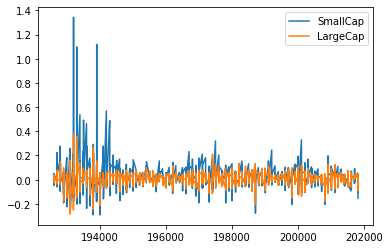

In [64]:
returns.plot.line()

In [65]:
# volatility
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [66]:
# calculate annualised volatility
annualised_vol = returns.std() * np.sqrt(12)
annualised_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [67]:
# calculate the returns per month 
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [68]:
# calculate annualised return
annualised_return = (return_per_month + 1)**12 - 1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [69]:
# calculate annualised return in one line 
annualised_return = (returns + 1).prod()**(12/n_months) - 1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [70]:
# ratio of return compared to risk
annualised_return/annualised_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [71]:
# calculate sharpe ratio given a risk free rate of 3%
riskfree_rate = 0.03
excess_return = annualised_return - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64